Carga de las librerias para el proceso

In [1]:
# Básicas para el trabajo de los datos
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# Estimadores Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Estimadores Clasificación
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

# Métricas del modelo
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
from sklearn.model_selection import train_test_split

Carga de la información, análisis y pre-proceso

In [2]:
# Carga el archivo csv dentro de Python
credit = pd.read_csv('default of credit card clients.csv', header =1)
# Ver una parte de la información del data set cargado
print('***** Parte de la información a procesar *****')
print(credit.head())
# Ver la composición de los datos del data set
print('***** Composición de los datos del Data Set *****')
print(credit.describe())

***** Parte de la información a procesar *****
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  defaul

In [3]:
# Verificación de los tipos de datos de las variables
print('***** Tipos de datos del Data Set *****')
credit.info()

***** Tipos de datos del Data Set *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000

In [4]:
# Se elimina el ID por no se un dato requerido en el análisis
credit2 = credit.drop('ID', axis=1)
# Se confirma el proceso
print('***** Data Set sin el ID *****')
credit2.info()

***** Data Set sin el ID *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null

In [5]:
# Se verifica si no hay datos en alguna de las celdas
pd.isnull(credit2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# En caso de ser necesario, se aplica la función para eliminar las filas que le falta información
credit3 = credit2.dropna()
# y se verifican los resultados
credit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
# Se graba el nuevo Data Set
credit3.to_csv('Credit_Card_Clients.csv')

Estimación de la Covarianza en el Data Set

In [8]:
# Cálculo de la covarianza para el Data Set original
covMat = credit.cov()
print('***** Matriz de Covarianza Data Set original *****')
print(covMat)

***** Matriz de Covarianza Data Set original *****
                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                 

In [9]:
# Cálculo de la covarianza para el Data Set modificado
covMat3 = credit3.cov()
print('***** Matriz de Covarianza Data Set modificado *****')
print(covMat3)

***** Matriz de Covarianza Data Set modificado *****
                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2               

In [10]:
# Creación de una matriz de correlación básica con pandas
corrMat3 = credit3.corr()
print('***** Matriz de Correlación Data Set modificado *****')
print(corrMat3)

***** Matriz de Correlación Data Set modificado *****
                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2 

Análisis Exploratorio de los Datos

In [11]:
# Carga de librerias adicionales
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline

# Asignación del tamaño por defecto de la figura
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

In [12]:
# Cantidad de clientes por estado civil
print('***** Cantidad de Clientes por Estado Civil *****')
credit.groupby('MARRIAGE')['MARRIAGE'].count()

***** Cantidad de Clientes por Estado Civil *****


MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

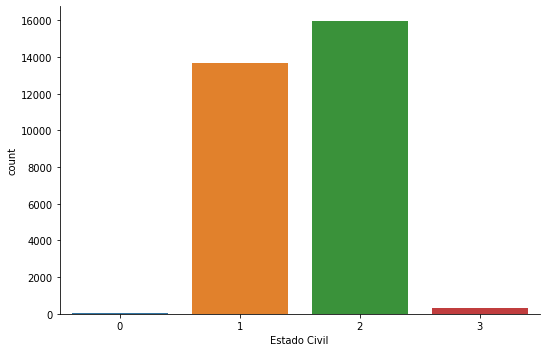

In [13]:
# Se grafica la cantidad de clientes según el estado civil
fg = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Estado Civil')

La mayoría de los clientes están solteros, pero la diferencia con los casados es muy poca. La cantidad de divorciados y otros estados civiles son muy bajos

In [14]:
# Cantidad de clientes por nivel de estudio
print('***** Cantidad de Clientes según el Nivel de Estudio *****')
credit.groupby('EDUCATION')['EDUCATION'].count()

***** Cantidad de Clientes según el Nivel de Estudio *****


EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

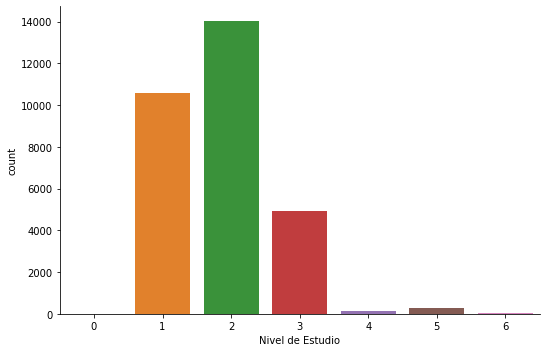

In [15]:
# Se grafica la cantidad de clientes según el nivel de estudio
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Nivel de Estudio')

En el set de datos tenemos una gran cantidad de clientes con estudios universitarios, con una gran diferencia con los
graduados de la escuela. Estos últimos son un poco más del doble de los graduados del colegio. Los otro niveles de
estudio son muy bajos.

In [16]:
# Cantidad de clientes según el sexo
print('***** Cantidad de Clentes según el Sexo *****')
credit.groupby('SEX')['SEX'].count()

***** Cantidad de Clentes según el Sexo *****


SEX
1    11888
2    18112
Name: SEX, dtype: int64

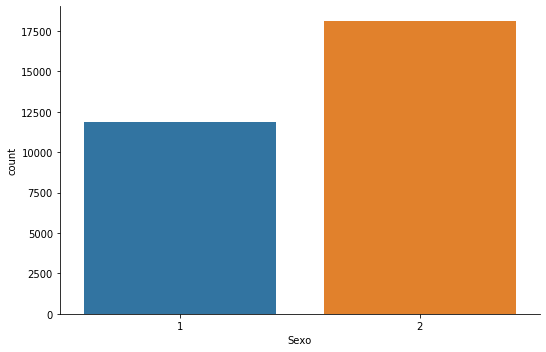

In [17]:
# Se grafica la cantidad de clientes según el sexo
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Sexo')

La cantidad de mujeres que son clientes sobrepasan en una tercera parte a los hombres

In [18]:
# Cantidad de clientes según su estado de pago
print('***** Cantidad de clientes según su estado de pago *****')
credit.groupby('default payment next month')['default payment next month'].count()

***** Cantidad de clientes según su estado de pago *****


default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

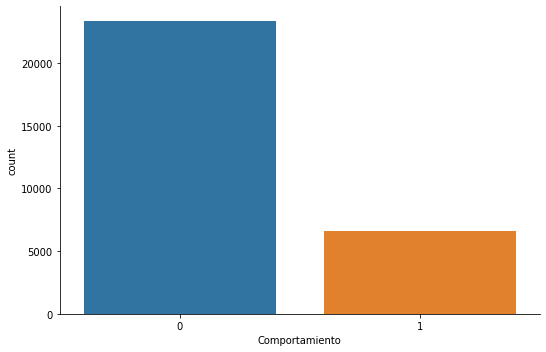

In [19]:
# Se grafica la cantidad de clientes según el estado del pago
fg = sns.catplot('default payment next month', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Comportamiento')

En general, un 22% de los clientes tienen el comportamiento por defecto, están debiendo

In [20]:
# Cantidad de mujeres y hombres por cada comportamiento
print('***** Distribución de los hombres y las mujeres según su estado de pago *****')
credit.groupby(['SEX', 'default payment next month'])['SEX'].count()

***** Distribución de los hombres y las mujeres según su estado de pago *****


SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: SEX, dtype: int64

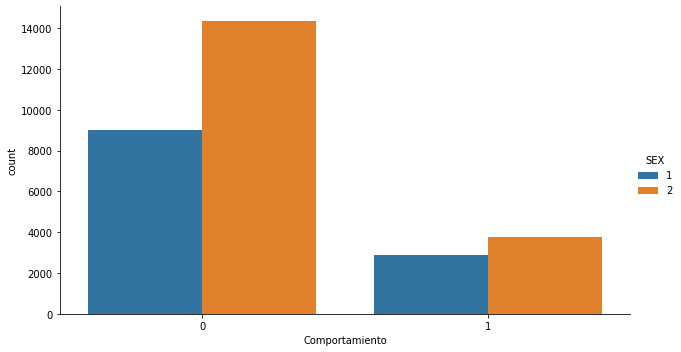

In [21]:
# Se grafican los resultados anteriores
g = sns.catplot('default payment next month', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Comportamiento')

Un 24% de los hombre están debiendo, de las mujeres es el 21%

In [22]:
# Comportamiento según el estado civil del cliente
print('***** Distribución de clientes por estado civil según su estado de pago *****')
credit.groupby(['MARRIAGE', 'default payment next month'])['MARRIAGE'].count()

***** Distribución de clientes por estado civil según su estado de pago *****


MARRIAGE  default payment next month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: MARRIAGE, dtype: int64

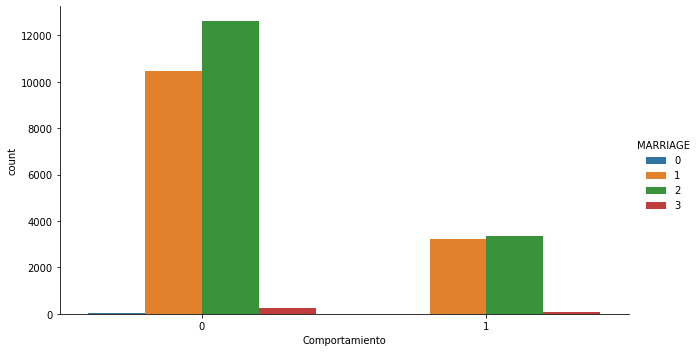

In [23]:
# Se grafican los resultados anteriores
g = sns.catplot('default payment next month', data=credit, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Comportamiento')

El 23% de los clientes casados, el 21% de los solteros y el 26% de divorsidaos están debiendo, el otro tipo está en el 9%.

In [24]:
# Comportamiento según el nivel de estudio del cliente
print('***** Distribución de clientes por nivel de estudio según su estado de pago *****')
credit.groupby(['EDUCATION', 'default payment next month'])['EDUCATION'].count()

***** Distribución de clientes por nivel de estudio según su estado de pago *****


EDUCATION  default payment next month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: EDUCATION, dtype: int64

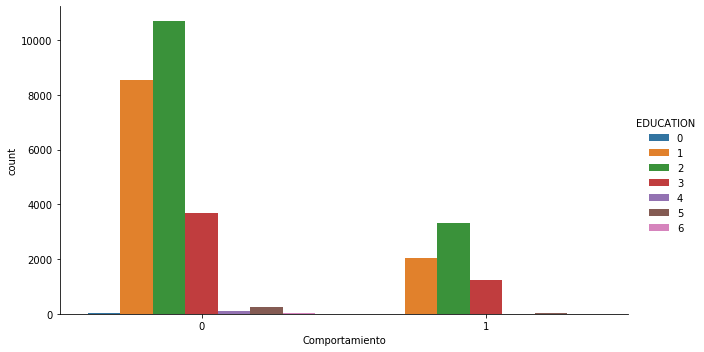

In [25]:
# Se grafican los resultados anteriores
g = sns.catplot('default payment next month', data=credit, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('Comportamiento')

El 19% de los clientes con edución escolar, el 24% de los universitarios y el 25% de los graduados de colegio están debiendo. El resto de las personas tienen un porcentaje inferior al 15%, la mayoría bajo 6%.

Proceso para dividir las edades en 4 tractos, aproximadamente de 21 a 35, de 36 a 50, de 51 a 65 y de 66 a 79

In [26]:
# Carga lo necesario para el proceso de discreción
from sklearn.preprocessing import KBinsDiscretizer
# Carga los datos modificados en un data set independiente para hacer el ajuste
credit2 = pd.read_csv('Credit_Card_Clients.csv')
# Ajusta el dato de la edad por rangos
AGE_dis = KBinsDiscretizer(n_bins = 4, encode='ordinal', strategy = "kmeans").fit_transform(credit[['AGE']])
AGE_dis = pd.DataFrame(AGE_dis).astype(int)
AGE_dis = AGE_dis.rename(columns = {0: 'AGE'})
credit2[['AGE']] = AGE_dis

In [27]:
# Cantidad de clientes por edad
print('***** Cantidad de Clientes por Grupos de Edad *****')
credit2.groupby('AGE')['AGE'].count()

***** Cantidad de Clientes por Grupos de Edad *****


AGE
0    13388
1     9162
2     5181
3     2269
Name: AGE, dtype: int64

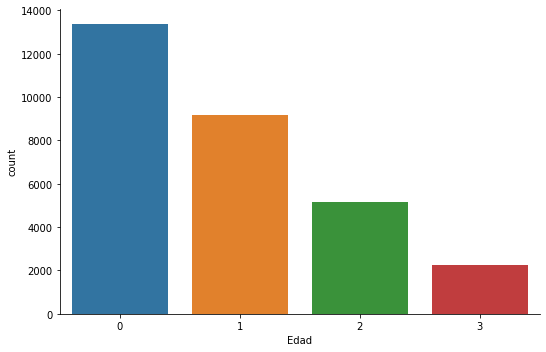

In [28]:
# Se grafica la cantidad de clientes según la edad
fg = sns.catplot('AGE', data=credit2, kind='count', aspect=1.5)
fg.set_xlabels('Edad')

La mayoría de los clientes están en los primeros rangos de edad

In [29]:
# Comportamiento según la edad del cliente
print('***** Distribución de clientes por rango de edad según su estado de pago *****')
credit2.groupby(['AGE', 'default payment next month'])['AGE'].count()

***** Distribución de clientes por rango de edad según su estado de pago *****


AGE  default payment next month
0    0                             10463
     1                              2925
1    0                              7242
     1                              1920
2    0                              3967
     1                              1214
3    0                              1692
     1                               577
Name: AGE, dtype: int64

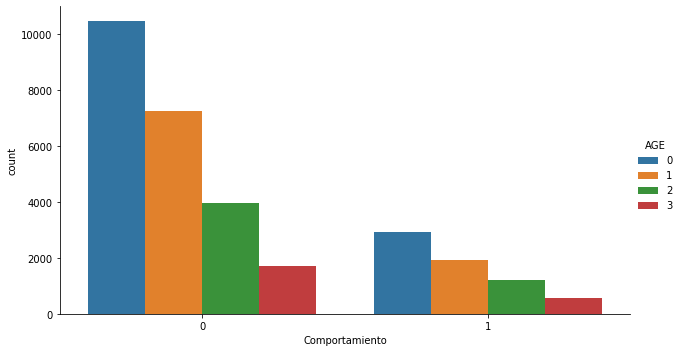

In [30]:
# Se grafican los resultados anteriores
g = sns.catplot('default payment next month', data=credit2, hue='AGE', kind='count', aspect=1.75)
g.set_xlabels('Comportamiento')

En los dos primeros rangos de edades, tenemos los porcentajes más bajos, 22% y 21% respectivamente. Los dos últimos rangos son un poco más altos, 23% y 25%, pero se mantienen muy semejantes

Proceso para dividir el límite en 4 tractos: 10k a 208K, 208K a 406K, 406K a 604K, 604K a 802K y 802K a 1M

In [31]:
# Ajusta el dato del límite por rangos
LIMIT_dis = KBinsDiscretizer(n_bins = 5, encode='ordinal', strategy = "kmeans").fit_transform(credit[['LIMIT_BAL']])
LIMIT_dis = pd.DataFrame(LIMIT_dis).astype(int)
LIMIT_dis = LIMIT_dis.rename(columns = {0: 'LIMIT_BAL'})
credit2[['LIMIT_BAL']] = LIMIT_dis

In [32]:
# Cantidad de clientes por edas
print('***** Cantidad de Clientes por Grupos de Límite de Crédito *****')
credit2.groupby('LIMIT_BAL')['LIMIT_BAL'].count()

***** Cantidad de Clientes por Grupos de Límite de Crédito *****


LIMIT_BAL
0    13812
1     9121
2     4818
3     2098
4      151
Name: LIMIT_BAL, dtype: int64

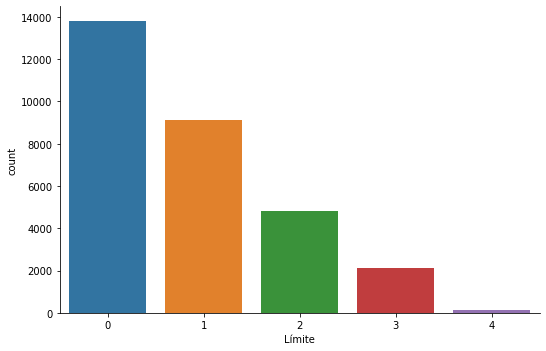

In [33]:
# Se grafica la cantidad de clientes según la edad
fg = sns.catplot('LIMIT_BAL', data=credit2, kind='count', aspect=1.5)
fg.set_xlabels('Límite')

La gran mayoría de los clientes tienen límites entre los 10K y 208K, seguidos por aquellos con montos entre 208K y 406K

In [34]:
# Comportamiento según el límite de crédito del cliente
print('***** Cantidad de Clientes por Grupo de Límite de Crédito *****')
credit2.groupby(['LIMIT_BAL', 'default payment next month'])['LIMIT_BAL'].count()

***** Cantidad de Clientes por Grupo de Límite de Crédito *****


LIMIT_BAL  default payment next month
0          0                             9817
           1                             3995
1          0                             7468
           1                             1653
2          0                             4096
           1                              722
3          0                             1850
           1                              248
4          0                              133
           1                               18
Name: LIMIT_BAL, dtype: int64

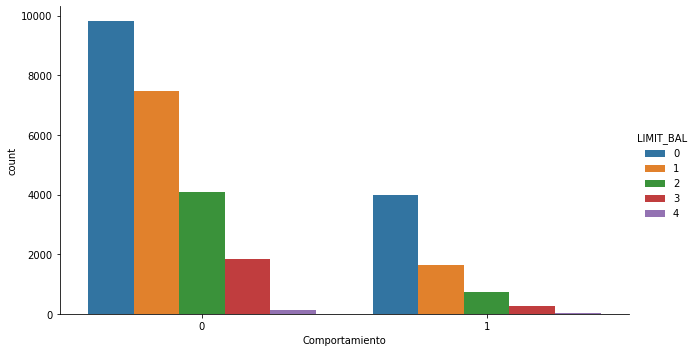

In [35]:
# Se grafican los resultados anteriores
g = sns.catplot('default payment next month', data=credit2, hue='LIMIT_BAL', kind='count', aspect=1.75)
g.set_xlabels('Comportamiento')

El comportamiento según el límite de crédito refleja que los que están entre los 10K y 208K hay un 29% que está debiendo, entre los 208K y 406K es un 18%, entre 406K y 604K son el 15%, y los dos últimos rangos son un 12% cada uno.

In [36]:
# Cantidad de clientes que están debiendo, agrupados por grupo de edad y sexo, con los totales
credit2.pivot_table('default payment next month', 'SEX', 'AGE', aggfunc=np.sum, margins=True)

AGE,0,1,2,3,All
SEX,,,,,
1,1122,894,558,299,2873
2,1803,1026,656,278,3763
All,2925,1920,1214,577,6636


In [37]:
# Crea data set para los que no están debiendo
no_deben = credit2[credit2['default payment next month']==0]
# Muestra la cantidad de filas de datos del DS
print(len(no_deben))
# Presenta la tabla por rango de edad y sexo que no están debiendo
no_deben.pivot_table('default payment next month', 'SEX', 'AGE', aggfunc=len, margins=True)

23364


AGE,0,1,2,3,All
SEX,,,,,
1,3679,2863,1676,797,9015
2,6784,4379,2291,895,14349
All,10463,7242,3967,1692,23364


In [38]:
# Información por la edad de los clientes
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

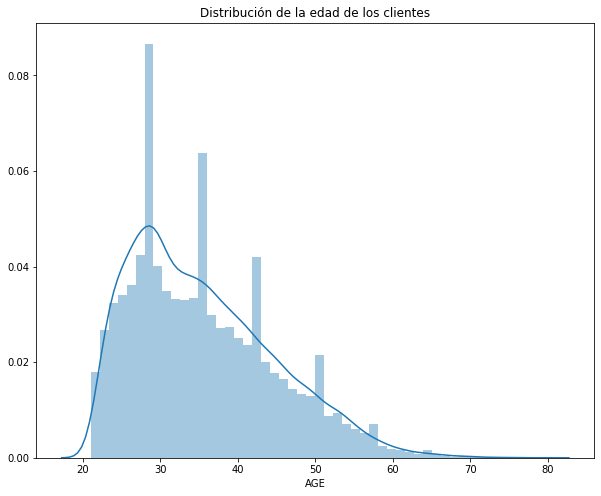

In [39]:
age = credit['AGE'].dropna()
ageDist = sns.distplot(age)
ageDist.set_title("Distribución de la edad de los clientes")

Text(0.5, 1.0, 'Distribución del límite del crédito de los clientes')

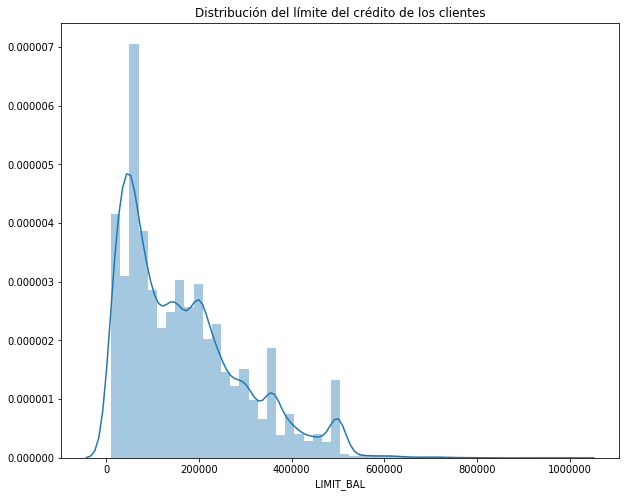

In [40]:
age = credit['LIMIT_BAL'].dropna()
ageDist = sns.distplot(age)
ageDist.set_title("Distribución del límite del crédito de los clientes")

Selección de características (variables independientes) y la variable dependiente

In [41]:
# Seleccionar las características
features = credit.iloc[:,1:6]
print('Resumen de la muestra de las caracteríticas')
features.head()

Resumen de la muestra de las caracteríticas


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57


In [42]:
# Seleccionar la variable ddependiente
depVar = credit['default payment next month']
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [43]:
# Creación de los conjuntos de entrenamiento y pruebas (70/30)
X_train, X_test, y_train, y_test = train_test_split(features, depVar, train_size = 0.70, random_state = 123)
print('*** Cantidad de observaciones para entrenamiento(indepenientes): ', str(len(X_train)))
print(X_train.head())
print('*** El número de observaciones para entrenamiento(dependiente): ',str(len(y_train.index)))
print(y_train.head())

*** Cantidad de observaciones para entrenamiento(indepenientes):  21000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
16395     320000    2          1         2   36
21448     440000    2          1         2   30
20034     160000    2          3         1   44
25755     120000    2          2         1   30
1438       50000    1          2         2   54
*** El número de observaciones para entrenamiento(dependiente):  21000
16395    0
21448    0
20034    0
25755    0
1438     0
Name: default payment next month, dtype: int64


In [44]:
# Conjunto de pruebas (Testing)
print('*** Cantidad de observaciones para pruebas(indepenientes): ',str(len(X_test.index)))
print(X_test.head())
print('*** El número de observaciones para pruebas(dependiente): ',str(len(y_test.index)))
print(y_test.head())

*** Cantidad de observaciones para pruebas(indepenientes):  9000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
25665      40000    2          2         2   26
16464      80000    2          3         1   59
22386     170000    2          1         2   30
10149     200000    2          2         1   41
8729       50000    1          2         1   43
*** El número de observaciones para pruebas(dependiente):  9000
25665    0
16464    0
22386    1
10149    1
8729     0
Name: default payment next month, dtype: int64


Construcción de los modelos y selección del mejor

In [77]:
# Parámetros y definición del modelo
model = LinearRegression(n_jobs=10)

In [45]:
#Definición para los modelos a utilizar
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelRC = RidgeClassifier()

In [46]:
# Ejecución de los tres modelos (Random Forest)
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# Support Vector Classification (SVC)
modelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
# Ridge Classifier
modelRC.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

Para el proceso de selección del mejor modelo

In [49]:
# Carga de la función a utilizar
from sklearn.model_selection import cross_val_score

In [50]:
# Obtener le puntaje de cada modelo (Random Forest)
print(cross_val_score(modelRF, X_train, y_train)) 

[0.72261905 0.7297619  0.72380952 0.72619048 0.72857143]


In [51]:
# Support Vector Classification (SVC)
print(cross_val_score(modelSVC, X_train, y_train)) 

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


In [52]:
# Ridge Classifier
print(cross_val_score(modelRC, X_train, y_train)) 

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


Ajuste y puntuación de los modelos

In [53]:
# Random Forest
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.72095238 0.72428571 0.725      0.72738095 0.72666667]


0.8468095238095238

In [54]:
# Support Vector Classification (SVC)
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [55]:
# Ridge Classifier
modelRC.fit(X_train,y_train)
print(cross_val_score(modelRC, X_train, y_train))
modelRC.score(X_train,y_train)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

El modelo con el puntaje más alto es el Random Forest Classification, este será usado en el resto del proceso

Evaluación del modelo

In [56]:
# Haciendo las predicciones
predictions = modelRF.predict(X_test)

In [57]:
## Evaluando los resultados
# Cálculo del RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)

In [58]:
# Cálculos
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.573
RMSE: 0.517


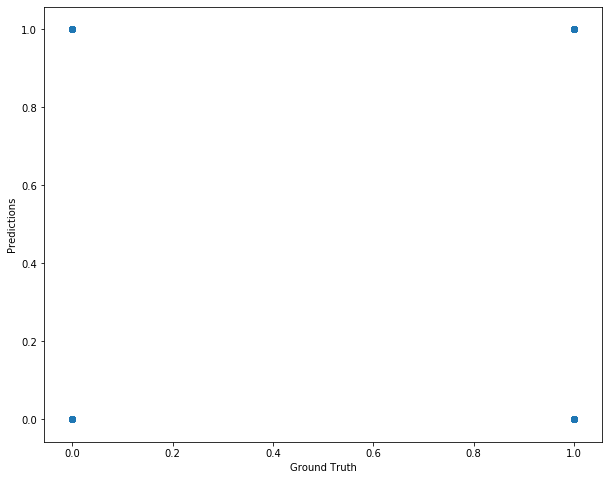

In [59]:
# Graficando los resultados
plt.scatter(y_test, predictions, alpha = 0.5) #, color=['blue','green'])
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

Ajustes de valores

In [60]:
features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57
...,...,...,...,...,...
29995,220000,1,3,1,39
29996,150000,1,3,2,43
29997,30000,1,2,2,37
29998,80000,1,3,1,41


In [61]:
features['MARRIAGE'] = np.where(features['MARRIAGE'] == 0, 3, features['MARRIAGE'])
features['MARRIAGE'].unique()

C:\Users\rartavia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 2, 3], dtype=int64)

In [65]:
# Cantidad de clientes por estado civil
print('***** Cantidad de Clientes por Estado Civil *****')
features.groupby('MARRIAGE')['MARRIAGE'].count()

***** Cantidad de Clientes por Estado Civil *****


MARRIAGE
1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64

In [63]:
features['EDUCATION'] = np.where(features['EDUCATION'] == 5, 4, features['EDUCATION'])
features['EDUCATION'] = np.where(features['EDUCATION'] == 6, 4, features['EDUCATION'])
features['EDUCATION'] = np.where(features['EDUCATION'] == 0, 4, features['EDUCATION'])
features['EDUCATION'].unique()

C:\Users\rartavia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rartavia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rartavia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

array([2, 1, 3, 4], dtype=int64)

In [66]:
# Cantidad de clientes por grado de educación
print('***** Cantidad de Clientes por Educación *****')
features.groupby('EDUCATION')['EDUCATION'].count()

***** Cantidad de Clientes por Educación *****


EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

In [67]:
# Creación de los conjuntos de entrenamiento y pruebas (70/30)
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, depVar, train_size = 0.70, random_state = 123)
print('*** Cantidad de observaciones para entrenamiento(indepenientes): ', str(len(X_train1)))
print(X_train1.head())
print('*** El número de observaciones para entrenamiento(dependiente): ',str(len(y_train1.index)))
print(y_train1.head())

*** Cantidad de observaciones para entrenamiento(indepenientes):  21000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
16395     320000    2          1         2   36
21448     440000    2          1         2   30
20034     160000    2          3         1   44
25755     120000    2          2         1   30
1438       50000    1          2         2   54
*** El número de observaciones para entrenamiento(dependiente):  21000
16395    0
21448    0
20034    0
25755    0
1438     0
Name: default payment next month, dtype: int64


In [68]:
# Conjunto de pruebas (Testing)
print('*** Cantidad de observaciones para pruebas(indepenientes): ',str(len(X_test1.index)))
print(X_test1.head())
print('*** El número de observaciones para pruebas(dependiente): ',str(len(y_test1.index)))
print(y_test1.head())

*** Cantidad de observaciones para pruebas(indepenientes):  9000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
25665      40000    2          2         2   26
16464      80000    2          3         1   59
22386     170000    2          1         2   30
10149     200000    2          2         1   41
8729       50000    1          2         1   43
*** El número de observaciones para pruebas(dependiente):  9000
25665    0
16464    0
22386    1
10149    1
8729     0
Name: default payment next month, dtype: int64


Ajustes a los modelos que son utilizados

In [78]:
#Definición para los modelos a utilizar
modelSVC1 = SVC(gamma='auto', probability=True)
modelRF1 = RandomForestClassifier(n_jobs=2, random_state=0)
modelRC1 = RidgeClassifier(alpha=2.0, max_iter=5)

In [79]:
# Random Forest
modelRF1.fit(X_train1,y_train1)
print(cross_val_score(modelRF1, X_train1, y_train1))
modelRF1.score(X_train1,y_train1)

[0.72357143 0.72357143 0.72333333 0.72833333 0.72880952]


0.8467619047619047

In [80]:
# Ridge Classifier
modelRC1.fit(X_train1,y_train1)
print(cross_val_score(modelRC1, X_train1, y_train1))
modelRC1.score(X_train1,y_train1)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [81]:
# Support Vector Classification (SVC)
modelSVC1.fit(X_train1,y_train1)
print(cross_val_score(modelSVC1, X_train1, y_train1))
modelSVC1.score(X_train1,y_train1)

[0.7752381  0.77285714 0.77119048 0.77428571 0.77547619]


0.7820476190476191

In [82]:
# Haciendo las predicciones
predictions1 = modelRF1.predict(X_test1)

In [83]:
## Evaluando los resultados
# Cálculo del RMSE
rmse1 = sqrt(mean_squared_error(y_test1, predictions1))
predRsquared1 = r2_score(y_test1,predictions1)

In [84]:
# Cálculos
predictions1 = modelRF1.predict(X_test1)
predRsquared1 = r2_score(y_test1,predictions1)
rmse1 = sqrt(mean_squared_error(y_test1, predictions1))
print('R Squared: %.3f' % predRsquared1)
print('RMSE: %.3f' % rmse1)

R Squared: -0.580
RMSE: 0.518


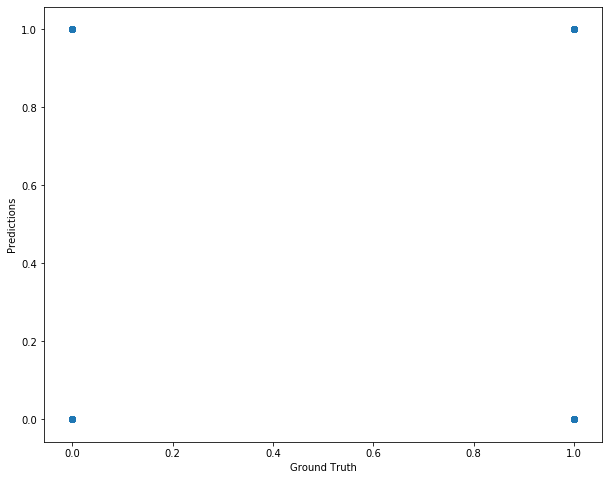

In [85]:
# Graficando los resultados
plt.scatter(y_test1, predictions1, alpha = 0.5) #, color=['blue','green'])
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();